# Create a bubble chart

In [2]:
import os
files = os.listdir(os.path.join('..', "bubble"))
for file in files:
    print(file)


Stock-Screener184229.csv


In [3]:
import pandas as pd

df = pd.read_csv(os.path.join("..","bubble",'Stock-Screener184229.csv'))

In [4]:
df.head()

,Company,CMP (Rs),P/E (x),MCap (Rs m),"D/E (Curr FY, x)","RoE (5 yrs, Avg. %)",Div Payout Ratio,"Profit CAGR (3 yrs, %)"
0,ZOMATO,184.1,462.9,"16,24,607",0.0,0.0%,0.0,NM
1,ADANI GREEN ENERGY,"1,863.8",304.0,"29,52,320",10.6,19.9%,0.0,90.6%
2,ADANI TOTAL GAS,978.4,165.6,"10,76,054",0.4,22.5%,4.1,12.3%
3,BHARTI AIRTEL,"1,425.8",147.9,"86,63,484",2.1,6.1%,19.4,NM
4,TRENT,"4,971.1",130.5,"17,67,146",0.1,11.5%,7.7,NM


In [12]:
df['CMP (Rs)'] = df['CMP (Rs)'].astype(float)
df['MCap (Rs m)'] = df['MCap (Rs m)'].astype(float)
df['D/E (Curr FY, x)'] = df['D/E (Curr FY, x)'].astype(float)
df['RoE (5 yrs, Avg. %)'] = df['RoE (5 yrs, Avg. %)'].astype(float)


In [44]:
!pip install seaborn
!pip install plotly

     -------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00
     --------------------------------------- 16.4/16.4 MB 43.7 MB/s eta 0:00:00


In [46]:
df['MCap (Rs m)'] = df['MCap (Rs m)'] * 0.0001

In [48]:
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px

fig = px.scatter(df, x='P/E (x)', y='RoE (5 yrs, Avg. %)', size='MCap (Rs m)', hover_name='Company',
                 log_x=True, log_y=True, size_max=60)

fig.update_layout(title='Interactive Bubble Chart', xaxis_title='P/E', yaxis_title='RoE')

fig.show()


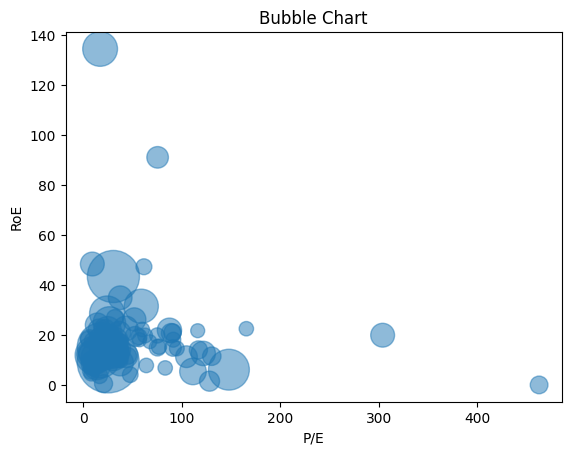

In [38]:
import matplotlib.pyplot as plt

plt.scatter(df['P/E (x)'], df['RoE (5 yrs, Avg. %)'], s=df['MCap (Rs m)']/10000, alpha=0.5)
plt.xlabel('P/E')
plt.ylabel('RoE')
plt.title('Bubble Chart')
plt.show()

In [18]:
pareto_front = df[(df['P/E (x)'] == df['P/E (x)'].max()) & (df['RoE (5 yrs, Avg. %)'] == df['RoE (5 yrs, Avg. %)'].max())]['Company']
best_companies = pareto_front.tolist()

In [19]:
best_companies

[]

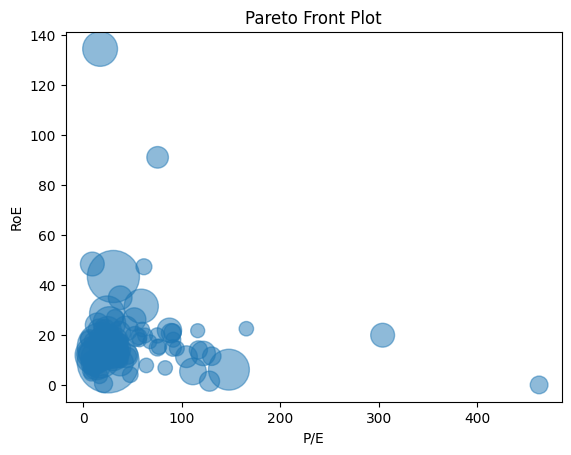

In [37]:
import matplotlib.pyplot as plt

plt.scatter(df['P/E (x)'], df['RoE (5 yrs, Avg. %)'], s=df['MCap (Rs m)']/10000, alpha=0.5)
plt.xlabel('P/E')
plt.ylabel('RoE')
plt.title('Pareto Front Plot')
plt.show()

In [24]:
top_ten_combinations = df[(df['P/E (x)'] >= 10) & (df['P/E (x)'] <= 30)].nlargest(10, 'RoE (5 yrs, Avg. %)')

In [25]:
top_ten_combinations


,Company,CMP (Rs),P/E (x),MCap (Rs m),"D/E (Curr FY, x)","RoE (5 yrs, Avg. %)",Div Payout Ratio,"Profit CAGR (3 yrs, %)"
71,LIFE INSURANCE CORPORATION,993.6,17.1,6284518.0,0.0,134.5,5.3,136.8%
60,INFOSYS,1533.4,24.2,6366309.0,0.0,28.6,72.6,10.6%
56,ITC,439.1,26.5,5482041.0,0.0,24.8,98.9,7.7%
78,ADANI POWER,767.3,14.2,2959236.0,0.8,24.0,0.0,154.1%
62,VEDANTA,460.5,22.7,1711588.0,2.0,22.6,260.3,NM
75,BAJAJ FINSERV,1564.7,16.0,2496461.0,4.6,22.0,1.0,26.8%
58,HCL TECHNOLOGIES,1431.1,24.7,3883390.0,0.0,21.9,87.7,10.3%
53,HERO MOTOCORP,5573.7,28.9,1114346.0,0.0,20.5,71.4,NM
68,POWER GRID,309.4,17.8,2877142.0,1.5,18.4,66.7,11.7%
59,JSW STEEL,912.0,24.4,2230254.0,1.2,17.5,19.8,1.8%


In [33]:
df.dropna(inplace=True)

In [34]:
filtered_df = df[df['Company'].apply(lambda x: 'STEEL' in x)]


In [35]:
filtered_df

,Company,CMP (Rs),P/E (x),MCap (Rs m),"D/E (Curr FY, x)","RoE (5 yrs, Avg. %)",Div Payout Ratio,"Profit CAGR (3 yrs, %)"
59,JSW STEEL,912.0,24.4,2230254.0,1.2,17.5,19.8,1.8%
69,JINDAL STEEL & POWER,1027.1,17.6,1047681.0,0.3,9.8,6.4,NM
